In [3]:
import numpy as np


### Normal distribution without `np.random.normal`

According to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), the appropriately rescaled sum of identically distributed random variables converges to the standard normal distribution if the random variables have finite variance. More precisely, if $X_1,X_2,\ldots,X_n$ are iid random variables with mean $\mu$ and variance $\sigma^2$, their rescaled sum
$$Z_n = \frac{\sum_{i=1}^{n}(X_i - \mu)}{\sigma\sqrt{n}}$$
converges to the standard normal distribution as $n\rightarrow\infty$. This allows us to (very inefficiently) generate approximately normally distributed random numbers.


Now, I am going to generate an array `clt_rand` that contains $10,000$ normally distributed random numbers using the central limit theorem by
1. Generating $n=1,000$ uniform random numbers betwenn 0 and 1 using `np.random.random`
2. Calculating their rescaled sum, i.e.,
    * subtract the theoretical mean from each random value (the mean of the [standard unform distibution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) is $1/2$),
    * calculate their sum,
    * and divide this by the theoretical standard deviation and $\sqrt{n}$ (the standard deviation is $1/\sqrt{12}$).
3. Repeating this $10,000$ times.




In [5]:
rand = np.random.random(size=(10000,1000))
theo_mean = 0.5
denominator = (1/np.sqrt(12))*np.sqrt(1000)

clt_rand = np.sum(rand - theo_mean, axis =1)/(denominator)
np.std(clt_rand)
np.mean(clt_rand)

-0.005696848446645225

In [6]:
rand1 = np.random.random(10000)
theo_mean = 0.5
denominator = (1/np.sqrt(12))*np.sqrt(1000)

rescaled_sum = np.sum(rand - theo_mean, axis =1)/(denominator)
clt_rand1 = np.repeat(rescaled_sum,10000)
np.std(clt_rand1)
np.mean(clt_rand1)


-0.005696848446645215

Now, I will plot and compare my solution to the theoretical normal distribution by running the next cell.

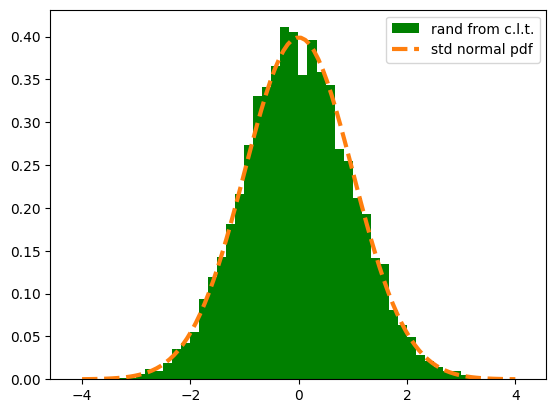

In [7]:
import matplotlib.pyplot as plt
plt.hist(clt_rand, 50, density=True, facecolor='g', alpha=1,label='rand from c.l.t.')
x = np.linspace(-4,4,100)
plt.plot(x,np.exp(-x**2/2)/(2*np.pi)**.5,'--',linewidth=3, label='std normal pdf')
plt.legend()